**Project Structure Overview**
------------------------------
    
1.  **Data Loading and Overview**
    
2.  **Data Preprocessing**
    
3.  **Exploratory Data Analysis (EDA)**
    
4.  **Feature Engineering**
    
5.  **Model Training**
    
6.  **Hyperparameter Tuning with Optuna**
    
7.  **Model Evaluation**
    
8.  **Feature Importance Analysis**
    
9.  **Model Serialization and Saving**
    
10.  **Deployment Considerations**
    
11.  **Conclusion**

# The data used here is not the real data used in COMAR! 

# Data Loading and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Hyperparameter Tuning
import optuna

# Model Serialization
import joblib

# For Interpretability
import shap


c:\Users\abdel\Desktop\Brahim\Projects\Risk Assessment\risk_assessment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('insurance_data.csv')
data.head()

,Unnamed: 0,age,gender,marital_status,vehicle_age,vehicle_type,annual_mileage,location,num_claims,credit_score,coverage_type,premium
0,0,69,Female,Married,8,Truck,14046,Rural,1,460,Standard,1248.00
1,1,32,Female,Divorced,4,Convertible,69831,Suburban,0,495,Standard,1727.49
2,2,89,Female,Single,2,Truck,68920,Urban,1,731,Standard,1878.64
3,3,78,Female,Married,10,Sedan,27835,Suburban,0,818,Basic,1041.23
4,4,38,Female,Married,24,Sedan,6550,Rural,0,360,Basic,1081.89


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327156 entries, 0 to 327155
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      327156 non-null  int64  
 1   age             327156 non-null  int64  
 2   gender          327156 non-null  object 
 3   marital_status  327156 non-null  object 
 4   vehicle_age     327156 non-null  int64  
 5   vehicle_type    327156 non-null  object 
 6   annual_mileage  327156 non-null  int64  
 7   location        327156 non-null  object 
 8   num_claims      327156 non-null  int64  
 9   credit_score    327156 non-null  int64  
 10  coverage_type   327156 non-null  object 
 11  premium         327156 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 30.0+ MB


In [4]:
data.describe()

,Unnamed: 0,age,vehicle_age,annual_mileage,num_claims,credit_score,premium
count,327156.000000,327156.000000,327156.000000,327156.000000,327156.000000,327156.000000,327156.000000
mean,163577.500000,58.466417,14.502338,52570.256896,0.500150,574.614863,1769.021640
std,94441.946671,23.679710,8.652156,27408.113406,0.707205,158.985685,375.773054
min,0.000000,18.000000,0.000000,5000.000000,0.000000,300.000000,522.310000
25%,81788.750000,38.000000,7.000000,28851.000000,0.000000,437.000000,1499.910000
50%,163577.500000,58.000000,15.000000,52601.500000,0.000000,575.000000,1768.940000
75%,245366.250000,79.000000,22.000000,76315.250000,1.000000,712.000000,2036.382500
max,327155.000000,99.000000,29.000000,100000.000000,6.000000,850.000000,3134.980000


In [5]:
data.isnull().sum()

Unnamed: 0        0
age               0
gender            0
marital_status    0
vehicle_age       0
vehicle_type      0
annual_mileage    0
location          0
num_claims        0
credit_score      0
coverage_type     0
premium           0
dtype: int64

# Data Preprocessing

In [6]:
data.drop('Unnamed: 0', inplace=True, axis=1)

Encoding Categorical Variables

In [7]:
categorical_cols = ['gender', 'marital_status', 'vehicle_type', 'location', 'coverage_type']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [8]:
data_encoded.head()

,age,vehicle_age,annual_mileage,num_claims,credit_score,premium,gender_Male,marital_status_Married,marital_status_Single,marital_status_Widowed,vehicle_type_Coupe,vehicle_type_SUV,vehicle_type_Sedan,vehicle_type_Truck,location_Suburban,location_Urban,coverage_type_Premium,coverage_type_Standard
0,69,8,14046,1,460,1248.00,False,True,False,False,False,False,False,True,False,False,False,True
1,32,4,69831,0,495,1727.49,False,False,False,False,False,False,False,False,True,False,False,True
2,89,2,68920,1,731,1878.64,False,False,True,False,False,False,False,True,False,True,False,True
3,78,10,27835,0,818,1041.23,False,True,False,False,False,False,True,False,True,False,False,False
4,38,24,6550,0,360,1081.89,False,True,False,False,False,False,True,False,False,False,False,False


Defining Features and Target

In [9]:
X = data_encoded.drop('premium', axis=1)
y = data_encoded['premium']

# Exploratory Data Analysis

a. Distribution of Target Variable

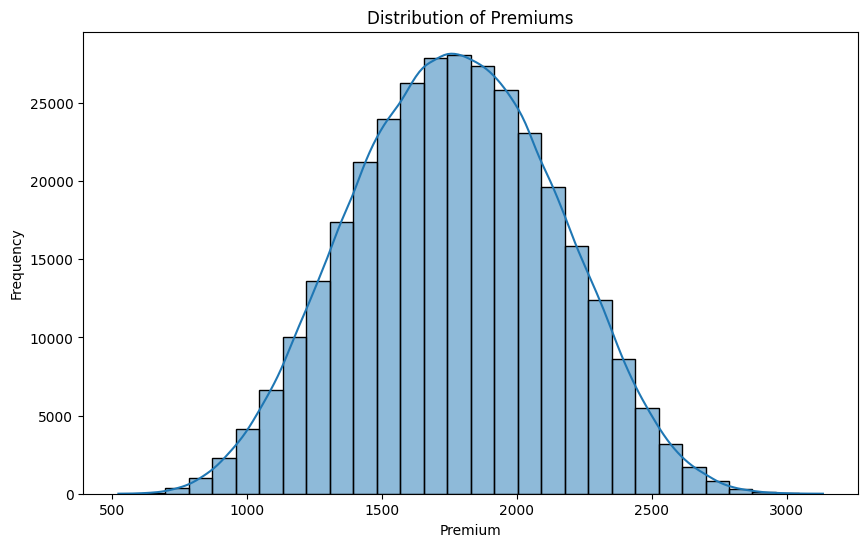

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Premiums')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.show()


b. Correlation Matrix


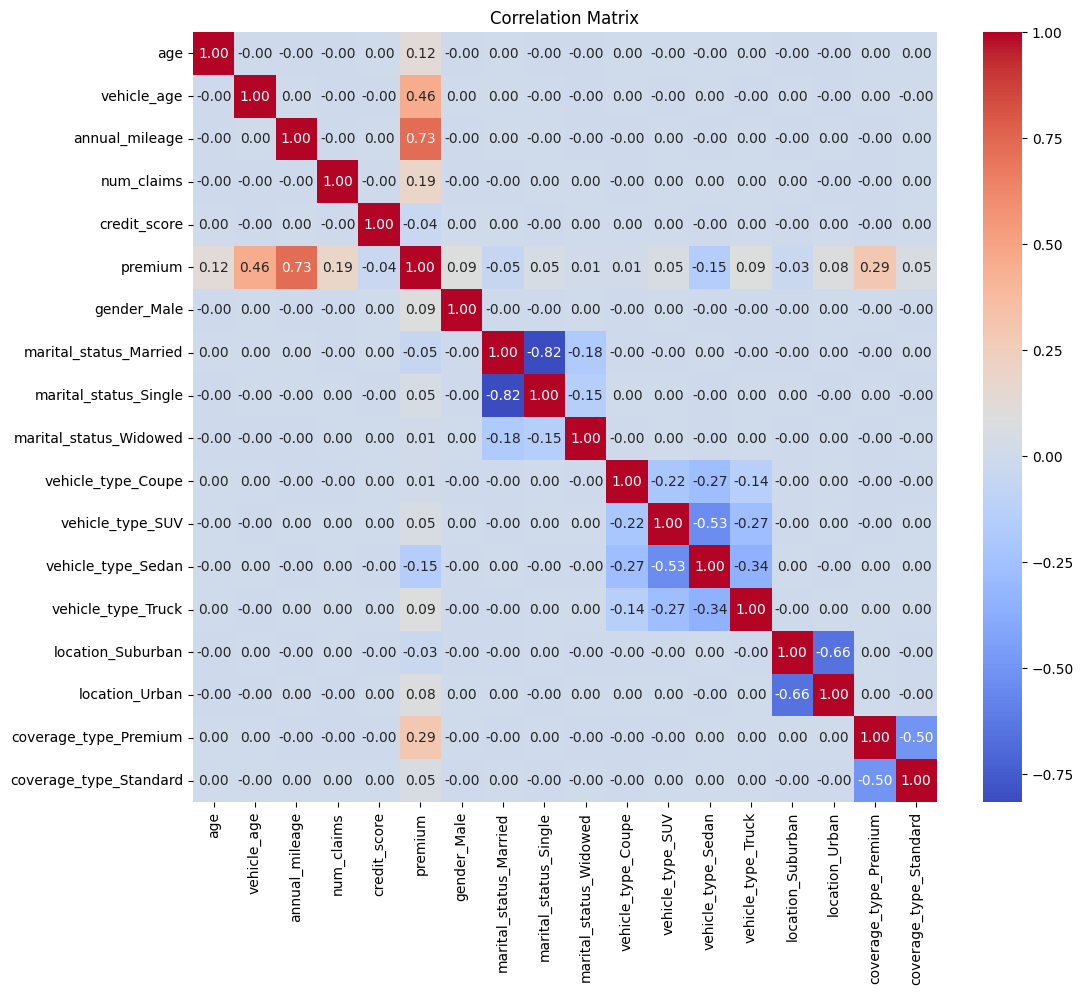

In [11]:
# Compute correlation matrix
corr_matrix = data_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


c. Pairwise Relationships


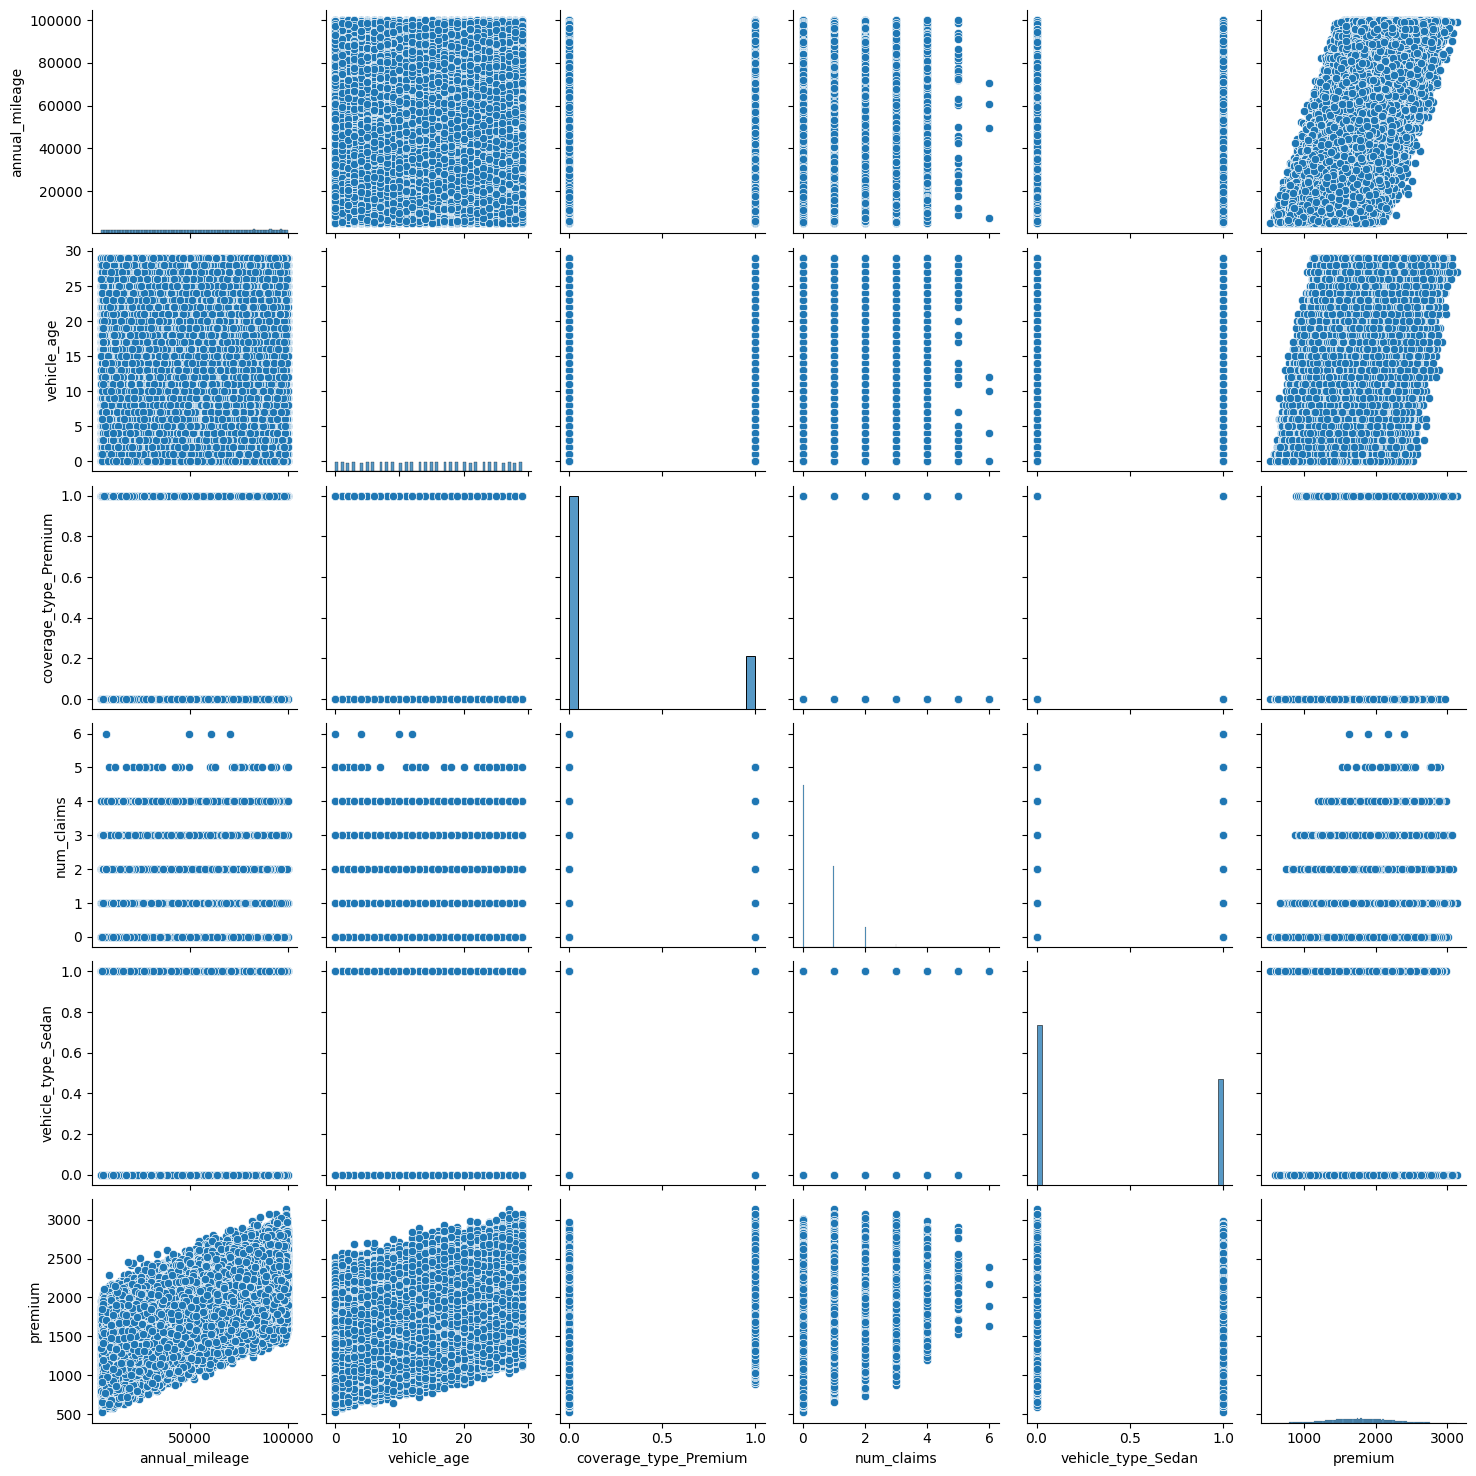

In [12]:
# Pairplot for top correlated features
top_corr_features = corr_matrix['premium'].abs().sort_values(ascending=False).index[1:6]
sns.pairplot(data_encoded[top_corr_features.tolist() + ['premium']])
plt.show()


# Feature Engineering

a. Creating Interaction Features

In [13]:
X['age_vehicle_age'] = X['age'] * X['vehicle_age']

# Model Training
a. Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (261724, 18)
Testing set size: (65432, 18)


b. Training Random Forest Regressor


In [15]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
rf_pred = rf.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")


Random Forest MAE: 50.0774
Random Forest RMSE: 63.2276
Random Forest R²: 0.9717


c. Training XGBoost Regressor


In [16]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=1, n_jobs=-1)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict on test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MAE: {xgb_mae:.4f}")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R²: {xgb_r2:.4f}")


XGBoost MAE: 41.8948
XGBoost RMSE: 52.3915
XGBoost R²: 0.9805


# Hyperparameter Tuning with Optuna

a. Setting Up Optuna for XGBoost


In [17]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_uniform('gamma', 0, 5)
    }
    model = xgb.XGBRegressor(**param, random_state=1, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='r2').mean()
    return score

# Create study
study = optuna.create_study(direction='maximize')

# Optimize
study.optimize(objective, n_trials=100)

# Best parameters
best_params = study.best_params
print("Best Parameters:", best_params)


[I 2024-09-26 22:58:26,455] A new study created in memory with name: no-name-bebd02f3-bcd6-436a-8f41-e8ed1125e404
C:\Users\abdel\AppData\Local\Temp\ipykernel_9664\3842361323.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\abdel\AppData\Local\Temp\ipykernel_9664\3842361323.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\abdel\AppData\Local\Temp\ipykernel_9664\3842361323.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

Best Parameters: {'n_estimators': 930, 'max_depth': 4, 'learning_rate': 0.03151648999311741, 'subsample': 0.8551404569789631, 'colsample_bytree': 0.6728375047598988, 'gamma': 3.268543669939309}


b. Training XGBoost with Best Parameters


In [18]:
# Initialize XGBoost with best parameters
best_xgb = xgb.XGBRegressor(
    **best_params,
    random_state=1,
    n_jobs=-1
)

# Train the model on training data
best_xgb.fit(X_train, y_train)

# Predict on test set
best_xgb_pred = best_xgb.predict(X_test)

# Evaluate
best_xgb_mae = mean_absolute_error(y_test, best_xgb_pred)
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, best_xgb_pred))
best_xgb_r2 = r2_score(y_test, best_xgb_pred)

print(f"Optimized XGBoost MAE: {best_xgb_mae:.4f}")
print(f"Optimized XGBoost RMSE: {best_xgb_rmse:.4f}")
print(f"Optimized XGBoost R²: {best_xgb_r2:.4f}")


Optimized XGBoost MAE: 40.3210
Optimized XGBoost RMSE: 50.4037
Optimized XGBoost R²: 0.9820


c. Cross-Validation with Optimized XGBoost


In [19]:
# Cross-validation
cv_scores_optimized = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
print(f"Optimized XGBoost CV R² Scores: {cv_scores_optimized}")
print(f"Average Optimized XGBoost CV R² Score: {cv_scores_optimized.mean():.4f}")

Optimized XGBoost CV R² Scores: [0.98178144 0.9819882  0.98193252 0.98195517 0.98205748]
Average Optimized XGBoost CV R² Score: 0.9819


# Model Evaluation

a. Comparing Models


In [20]:
# Create a comparison DataFrame
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Optimized XGBoost'],
    'MAE': [rf_mae, xgb_mae, best_xgb_mae],
    'RMSE': [rf_rmse, xgb_rmse, best_xgb_rmse],
    'R²': [rf_r2, xgb_r2, best_xgb_r2]
})

print(results)

               Model        MAE       RMSE        R²
0      Random Forest  50.077406  63.227612  0.971670
1            XGBoost  41.894793  52.391515  0.980549
2  Optimized XGBoost  40.321038  50.403681  0.981997


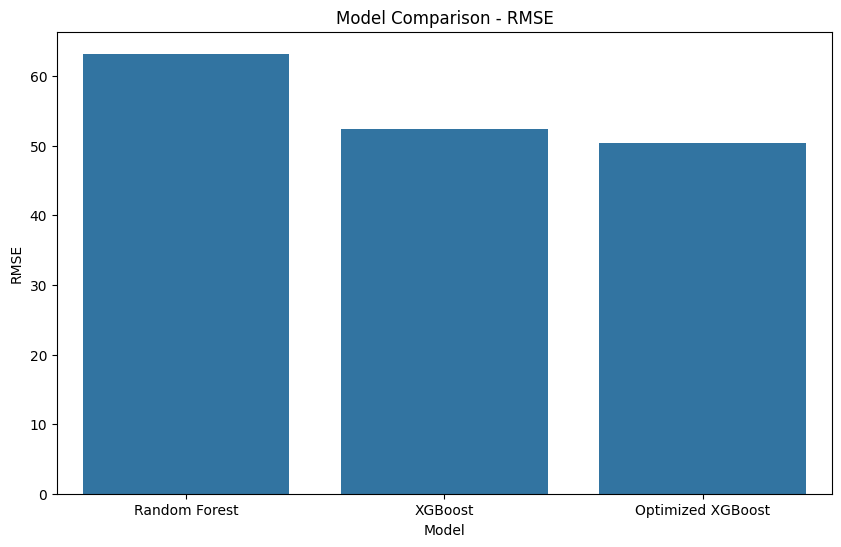

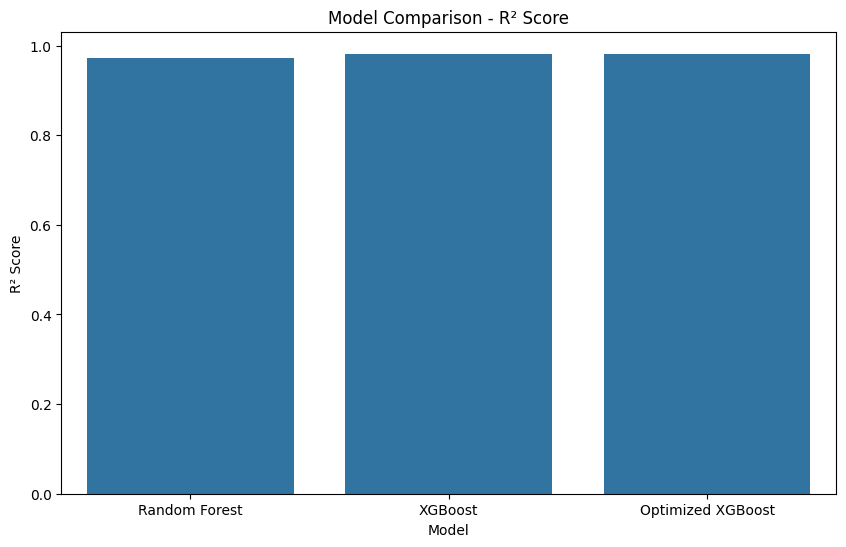

In [21]:
# Plotting RMSE
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.show()

# Plotting R²
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R²', data=results)
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.show()


b. Residual Analysis for Optimized XGBoost


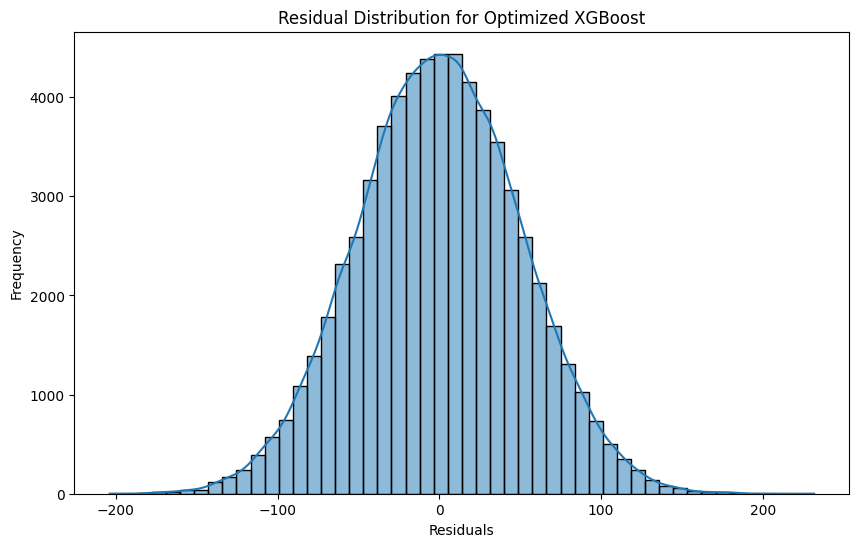

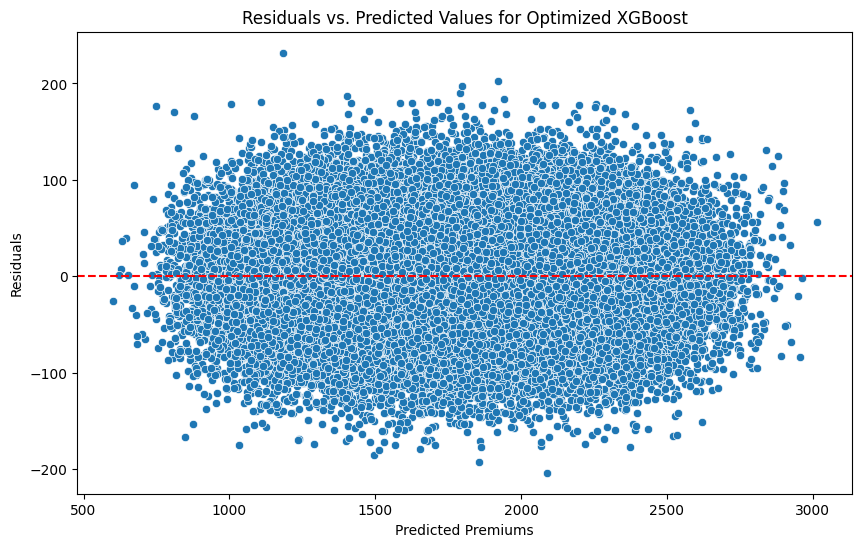

In [22]:
# Calculate residuals
residuals = y_test - best_xgb_pred

# Plot residual distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residual Distribution for Optimized XGBoost')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(10,6))
sns.scatterplot(x=best_xgb_pred, y=residuals)
plt.title('Residuals vs. Predicted Values for Optimized XGBoost')
plt.xlabel('Predicted Premiums')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


# Feature Umportance Analysis

a. Random Forest Feature Importance


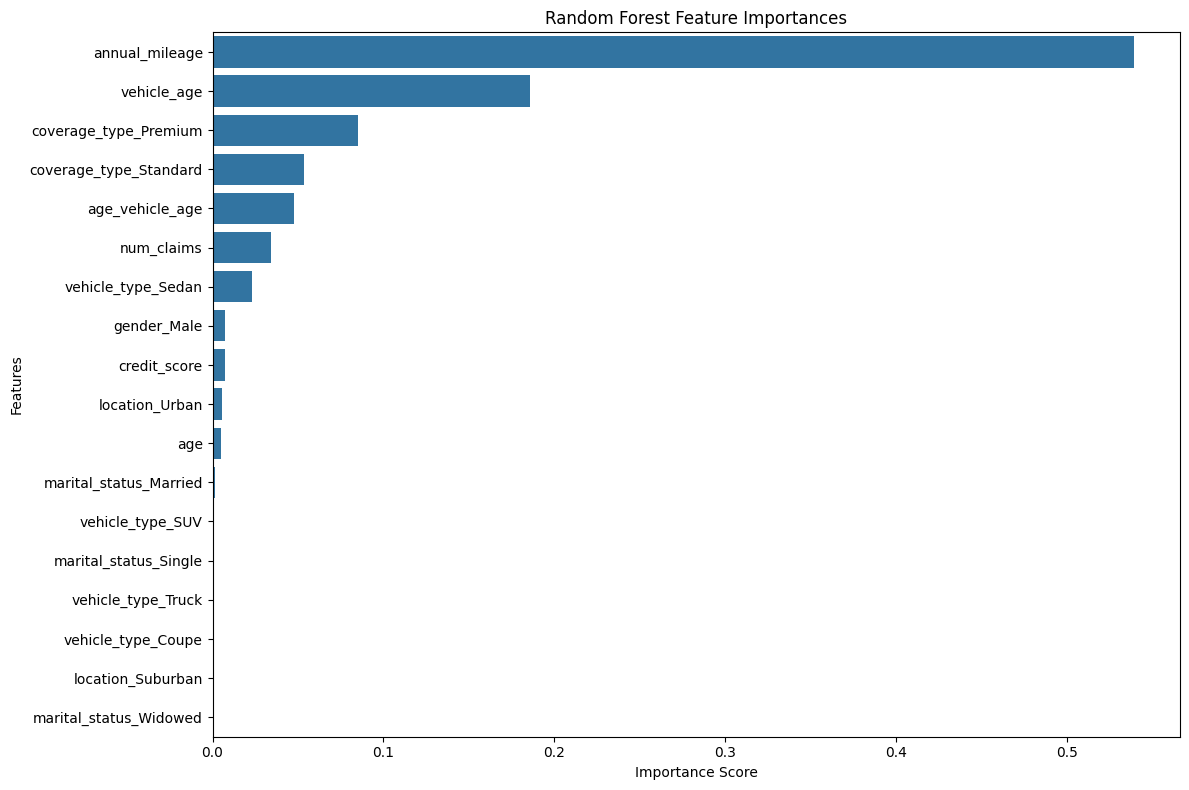

In [23]:
# Feature importances from Random Forest
importances_rf = rf.feature_importances_
feature_names_rf = X.columns
feature_importances_rf = pd.Series(importances_rf, index=feature_names_rf).sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_rf[:20], y=feature_importances_rf.index[:20])
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

b. Optimized XGBoost Feature Importance

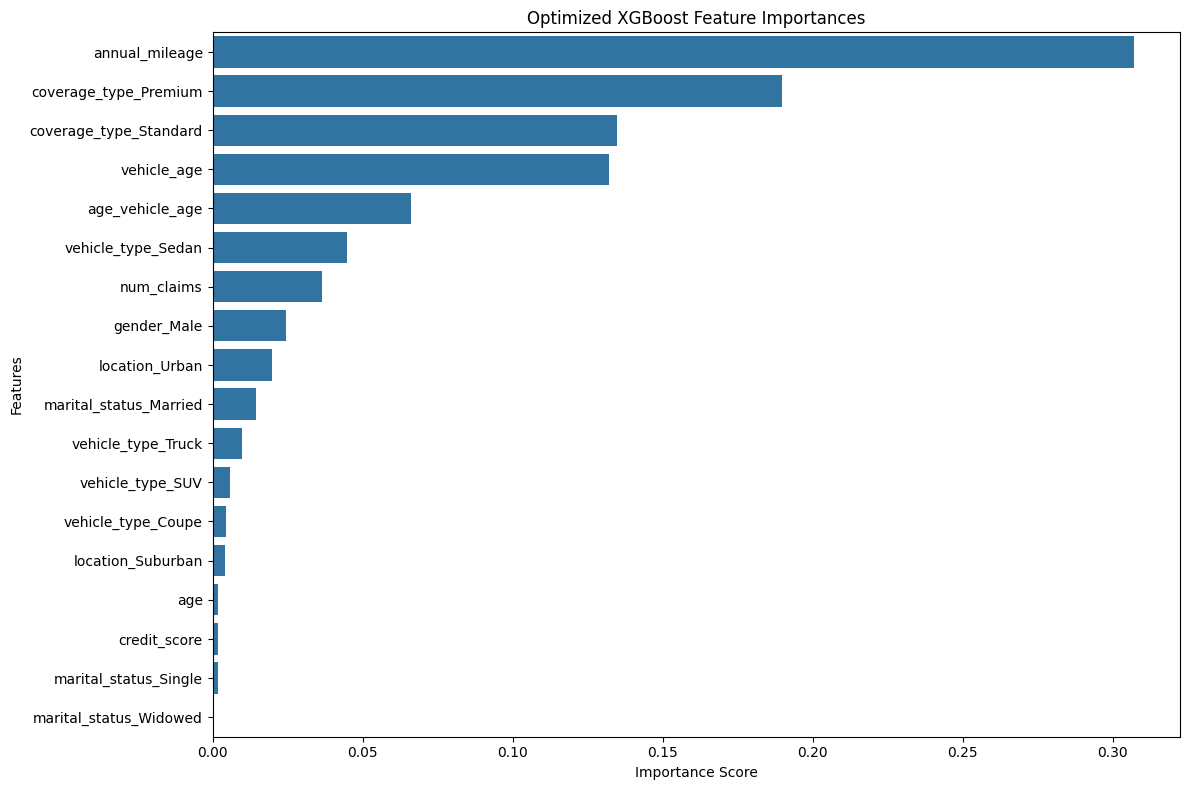

In [24]:
# Feature importances from Optimized XGBoost
importances_xgb = best_xgb.feature_importances_
feature_names_xgb = X.columns
feature_importances_xgb = pd.Series(importances_xgb, index=feature_names_xgb).sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_xgb[:20], y=feature_importances_xgb.index[:20])
plt.title('Optimized XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

c. SHAP Values for Optimized XGBoost

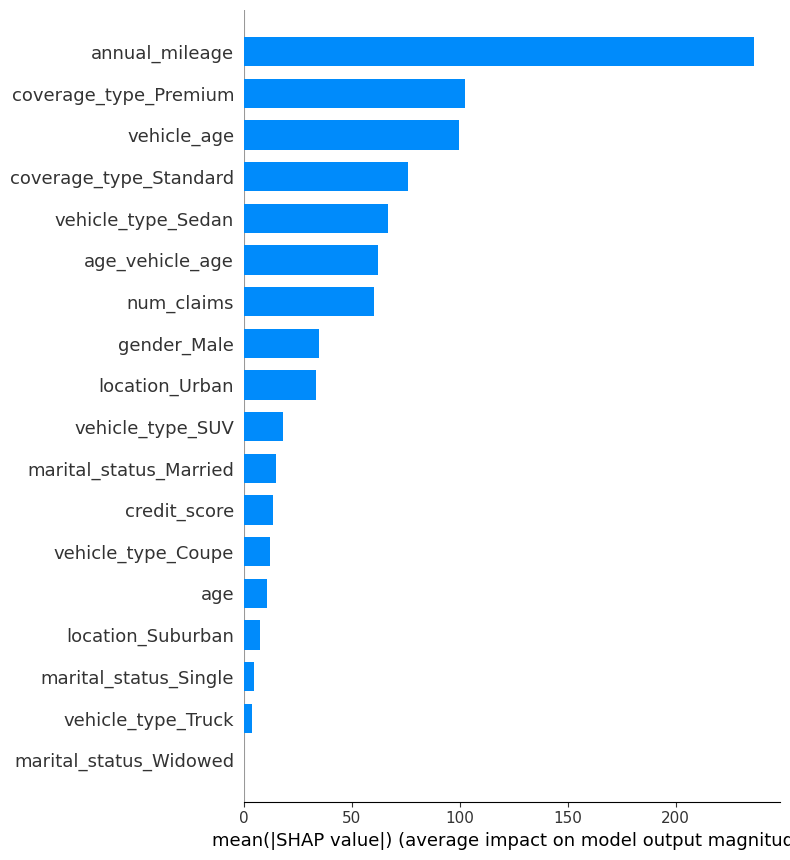

In [25]:
# Initialize SHAP Explainer
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Model Serialization and Saving

In [26]:
# Save the optimized XGBoost model
joblib.dump(best_xgb, 'optimized_xgboost_model.joblib')
print("Optimized XGBoost model saved as 'optimized_xgboost_model.joblib'")

# Save the Random Forest model (optional)
joblib.dump(rf, 'random_forest_model.joblib')
print("Random Forest model saved as 'random_forest_model.joblib'")


Optimized XGBoost model saved as 'optimized_xgboost_model.joblib'
Random Forest model saved as 'random_forest_model.joblib'


# Deployment

a. Creating the API


The API was created and you can access it and see the code in the `app.py`

b
. Running the API


run : `uvicorn app:app --reload`

Access the interactive API documentation at http://127.0.0.1:8000/docs.

Testing the API:

1. Navigate to the /predict/ endpoint.
2. Click on "Try it out".
3. Input sample data matching the InsuranceData schema.
4. Execute and observe the predicted premium.

d. Enhancements


* Input Validation: Ensure that inputs are within realistic ranges.
* Preprocessing Pipeline: Integrate preprocessing steps like encoding and feature engineering within the API.
* Security Measures: Implement authentication and secure data transmission, especially when dealing with sensitive information.
* Scalability: Deploy using platforms like AWS, GCP, or Azure for scalability.

# Conclusion

I'm happy to say that I have successfully developed a **Risk Assessment and Pricing Optimization** model using **Random Forest** and **XGBoost**, optimized it with **Optuna**, and prepared it for deployment. Here's a recap of the key steps : 


1.  **Data Preprocessing:** Cleaned and encoded categorical variables.
    
2.  **EDA:** Explored data distributions and feature relationships.
    
3.  **Feature Engineering:** Created interaction and polynomial features to enhance model performance.
    
4.  **Model Training:** Trained baseline models with Random Forest and XGBoost.
    
5.  **Hyperparameter Tuning:** Optimized XGBoost using Optuna to enhance performance.
    
6.  **Model Evaluation:** Assessed models using MAE, RMSE, and R² metrics, and performed residual analysis.
    
7.  **Feature Importance:** Analyzed feature importances to understand model drivers.
    
8.  **Model Serialization:** Saved trained models for future use.
    
9.  **Deployment Preparation:** Created a basic API using FastAPI for model predictions.
